## 탐색적 데이터 분석(EDA)

In [34]:
# 표준 라이브러리 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# csv 파일 로딩
file_path = 'D:/python3/data/chipotle.tsv'
# read_csv() : 데이터 프레임 형태로 불러오는 함수
chipo = pd.read_csv(file_path, sep='\t') #sep = 탭키 

In [3]:
# 데이터의 크기, 차원
chipo.shape

(4622, 5)

In [4]:
# 데이터의 기본 정보 확인
chipo.info() # 여기서 많은 정보를 얻어 가야함.
#Data columns -> 5개 속성값 
# (order_id, quantity, item_name, choice_description, item_price)
#                         총 4622인데 3376 -> 결칙값이 있을 것 -> 먼가 잘못됨.
# object(3) -> 영문자 3개, int64(2) -> 숫자 2개
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB


In [10]:
# 데이터 확인
# head() - 위에서 , tail() - 아래에서
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [11]:
# 행과 열 인덱스
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [12]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### DataSet의 속성들
- order_id : 주문번호
- quantity : 주문수량
- item_name : 메뉴명
- choice_description : 토핑명
- item_price : 주문가격

In [13]:
# 수치적인(연속적인) 데이터의 기술통계분석
chipo.describe()
# 수량으로 알아 낼수 있는 것


,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [14]:
# 주문번호는 숫자의 의미 담지 않는다.
chipo['order_id'] = chipo['order_id'].astype(str)

In [15]:
chipo.describe()

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


- 평균주문수량 : 1.07 => 적어도 1개는 주문, 한사람이 여러개 메뉴 주문X 

In [16]:
# item_price의 속성을 수치형으로 변환하는 작업
# item_price가 object(문자)로 되어 있는데 알고보니 $ 때문이었음.
# $를 제거하고 수치형으로 형변환을 해야함.
chipo['item_price'].head() # 기본값 : 5개

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [17]:
# apply() - 함수를 활용해 반복적 작업을 효율적으로 처리
# 함수 => lambda 입력 : 출력                               첫번째 부터 끝까지
chipo['item_price'] = chipo['item_price'].apply(lambda x : float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [18]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [19]:
chipo.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",9.25
4613,1831,1,Chips,NaN,2.15
4614,1831,1,Bottled Water,NaN,1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",8.75
4616,1832,1,Chips and Guacamole,NaN,4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",8.75


In [21]:
# order_id 와 같이, 범주형 데이터의 중복을 제거하는 함수 : unique()
len(chipo['order_id'].unique())

1834

In [22]:
len(chipo['item_name'].unique())

50

## 가장 많이 주문한 item_name의 Top10

In [24]:
# value_counts() : 개별요소의 건수를 추출
# value_counts()는 시리즈에서만 허용되는 함수
# DataFrame['columns'] 형태 : 시리즈 타입.
item_count=chipo['item_name'].value_counts()[:10] # 10개만 가져옴
item_count

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Chips                  211
Steak Bowl             211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64

In [27]:
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1): #option사용하면 items 사용X
    print('Top ', idx, ' : ', val, cnt)         # iteritems 사용 -> 1부터 시작하고 싶어서   

Top  1  :  Chicken Bowl 726
Top  2  :  Chicken Burrito 553
Top  3  :  Chips and Guacamole 479
Top  4  :  Steak Burrito 368
Top  5  :  Canned Soft Drink 301
Top  6  :  Chips 211
Top  7  :  Steak Bowl 211
Top  8  :  Bottled Water 162
Top  9  :  Chicken Soft Tacos 115
Top  10  :  Chicken Salad Bowl 110


### 주문서별 주문제품의 건수

In [31]:
# groupby() : 특정 피처를 기준으로 그룹을 생성한 후 그룹별로 작업.
# 아이템별 주문개수와 총량을 분석하는 작업
# 아이템별 주문개수  # item_name으로 묶고 order_id의 건수를 계산
order_count = chipo.groupby('item_name')['order_id'].count() # 떨어진 1번끼리 묶임.
order_count[:10] # 테이블 건수

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [32]:
# 아이템별 주문수량의 총계
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

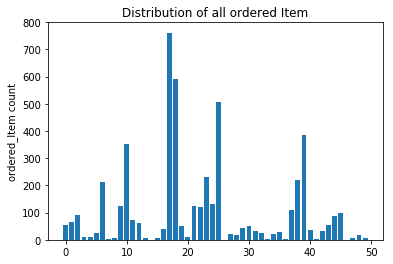

In [36]:
# 아이템별 주문수량의 총량을 시각화하는 작업
# 막대그래프를 활용

item_name_list = item_quantity.index.tolist() # 리스트 타입으로 변형
x_pos = np.arange(len(item_name_list)) # 50개

order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center') #막대기가 중앙에 있길 원하는 것
plt.title('Distribution of all ordered Item')
plt.ylabel('ordered_Item count')
plt.show()

### 각 아이템별 가격분석

In [37]:
# 수량이 1개인 제품만 추출하는 작업
chipo_one_item = chipo[chipo.quantity == 1]
chipo_one_item

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25
10,5,1,Chips and Guacamole,NaN,4.45


In [38]:
# 아이템별로 그룹 후 가장 작은 금액을 추출하는 작업.
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,1076,1,[Coke],6.49
Barbacoa Bowl,1000,1,"[Fresh Tomato (Mild), [Lettuce, Black Beans, R...",8.69
Barbacoa Burrito,1002,1,"[Fresh Tomato (Mild), [Black Beans, Rice, Sour...",8.69
Barbacoa Crispy Tacos,110,1,"[Fresh Tomato Salsa, Guacamole]",8.99
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99
Bottled Water,1009,1,NaN,1.09
Bowl,279,1,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",7.40
Burrito,214,1,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.40


In [39]:
# 정렬
price_per_item.sort_values(by = 'item_price')

,order_id,quantity,choice_description,item_price
item_name,,,,
Bottled Water,1009,1,NaN,1.09
Canned Soda,100,1,[Coca Cola],1.09
Canned Soft Drink,1003,1,[Coke],1.25
Side of Chips,1002,1,NaN,1.69
Chips,1005,1,NaN,1.99
Chips and Fresh Tomato Salsa,1,1,NaN,2.29
Chips and Tomatillo-Red Chili Salsa,1215,1,NaN,2.39
Chips and Tomatillo-Green Chili Salsa,1,1,NaN,2.39
Chips and Roasted Chili-Corn Salsa,1156,1,NaN,2.39


In [40]:
price_per_item.sort_values(by = 'item_price', ascending = False)

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [41]:
price_per_item.count()

order_id              50
quantity              50
choice_description    38
item_price            50
dtype: int64

In [42]:
price_per_item.sort_values(by= 'item_price')[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Bottled Water,1009,1,NaN,1.09
Canned Soda,100,1,[Coca Cola],1.09
Canned Soft Drink,1003,1,[Coke],1.25
Side of Chips,1002,1,NaN,1.69
Chips,1005,1,NaN,1.99
Chips and Fresh Tomato Salsa,1,1,NaN,2.29
Chips and Tomatillo-Red Chili Salsa,1215,1,NaN,2.39
Chips and Tomatillo-Green Chili Salsa,1,1,NaN,2.39
Chips and Roasted Chili-Corn Salsa,1156,1,NaN,2.39


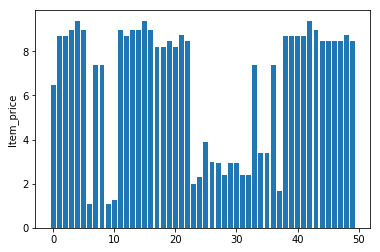

In [43]:
# 아이템별 가격 분포를 시각화하는 작업
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align='center')

plt.ylabel('Item_price')
plt.show() # 50개 가격 분포

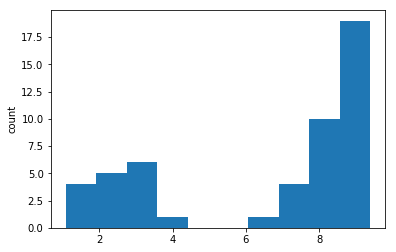

In [44]:
plt.hist(item_price) # 묶어 놓은거 (가격대 형성) -> 이 매장은 가격이 쎄다.
plt.ylabel('count')
plt.show()